# Tropical Elliptic Curves in Jupyter


## 政治大學應用數學系 蔡炎龍
## (joint work with 黃明怡)

## 2015 Workshop of Algebra and Geometry 2015
## 中正大學數學系

## About Python

* Python is a programming language.
* It's easy to learn yet powerful.

![Jupyter Logo](images/logo.png)

* Jupyter is a Python front end.

### NCCU PyDay

![NCCU PyDay](images/pyday.png)

* <b style="color:#6666FF;">Date</b>: June 8, 2015
* <b style="color:#6666FF;">Time</b>: 10:00 a.m. -- 3:00 p.m.
* <b style="color:#6666FF;">Place</b>: NCCU

## Python Loves Math

In [1]:
(3+4)**2

49

#### Buildin Complex Numbers

In [2]:
(2+3J)*(3+5J)

(-9+19j)

#### Lots of Packages

Jupyter provides "magic functions." For exmaple, the following magic function loads two packages:

* matplotlib: ploting package
* numpy: scientific computation

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


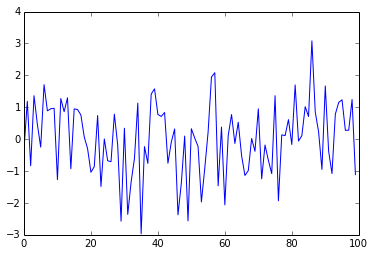

In [4]:
plot(randn(100))

#### Symbolic Computation

In [5]:
from sympy import *

Just make prettier output.

In [6]:
init_printing()

In [7]:
x = Symbol('x')

In [8]:
f = x**2 - 2*x + 3

In [9]:
diff(f,x)

In [10]:
integrate(1/x, x)

## Elliptic Curve

[Manjul Bhargava's Talk at ICM 2014](https://www.youtube.com/watch?v=Vx-4MUKCMPg)

Given a mathematical expression (eg. a polynomial), does it take a square value?

### Plimpton 322 Tablet

Plimpton 322 is a Babylonian clay tablet, it has many examples of triple (a,b,c) such that

$$a^2 + b^2 = c^2.$$

For example, 

$$12709^2 + 13500^2 = 18541^2.$$

In [11]:
12709**2 + 13500**2 == 18541**2

True

In [12]:
18541**2

An ellipitc cruve is a smooth algebraic curve of the form.

$$y^2 = x^3 + Ax + B$$.

In [13]:
def elliptic(A, B):
    x = linspace(-3,3,50)
    y = linspace(-3,3,50)
    X, Y = meshgrid(x, y)
    Z = Y**2 - X**3 + A*X + B
    contour(Z,[0])

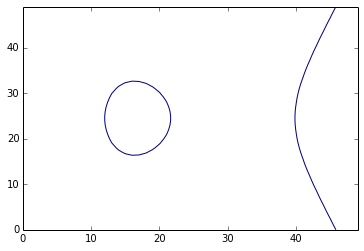

In [14]:
elliptic(3,1)

### Jupyter: Interactive Mode

In [15]:
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


We may use ''any'' function.

In [16]:
def f(x):
    print(x)

In [17]:
interact(f, x=(1,10))

5


<function __main__.f>

In [18]:
interact(f, x=(1., 10.))

5.5


<function __main__.f>

In [19]:
interact(f, x="你好")

你好


<function __main__.f>

In [20]:
interact(f, x={"微積分":1, "高等微積分":2, "線性代數":3})

1


<function __main__.f>

In [21]:
interact(f, x=True)

True


<function __main__.f>

### Our Elliptic Curves

<function __main__.elliptic>

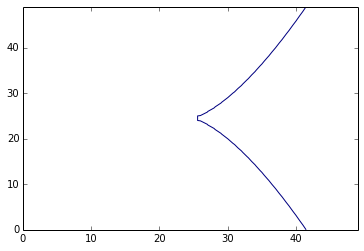

In [22]:
interact(elliptic, A=(-2.,2.), B=(-2.,2.))

### Group Law

![group law](images/grouplaw.gif)

## Basic Tropical Geometry

### Tropical Semiring

The <b style="color:red;">tropical semifield</b> $(\mathbb{T}, \oplus, \odot)$ is a semifield 
where $\mathbb{T} = \mathbb{R} \cup \{-\infty\}$, and has two binary operators $\oplus$  and $\odot$ defined as followings. 
$$\begin{align*}
a\oplus b &:= \max\{a,b\},\\
a \odot b &:=a+b
\end{align*}$$

In [23]:
class trop:
    """使用 trop 定義熱帶數字, 加法和乘法都是熱帶版的。"""
    def __init__(self, num):
        self.num = num
    def __add__(self, other):
        return trop(max(self.num, other.num))
    def __mul__(self, other):
        return trop(self.num + other.num)
    def __str__(self):
        return str(self.num)
    def __repr__(self):
        return str(self.num)

In [24]:
a = trop(3)
b = trop(5)

In [25]:
a

3

In [26]:
b

5

In [27]:
a+b

5

In [28]:
a*b

8

### Tropical Polynomial

The <b style="color:red;">tropical polynomial</b> $f(x)$ in $(\mathbb{T},\oplus,\odot)$ is defided by

$$\begin{align*}
f(x)&=\displaystyle \bigoplus_{i=0}^{n}\lambda_i \odot x^{\odot i}\\
&=\max\{\lambda_0 ,\lambda_1+x,\lambda_2+2x,\dotsc,\lambda_n+nx\},
\end{align*}$$

where $\lambda_i $ in $\mathbb{R}$ for all $i$ in $\{0,1,\dotsc,n\}$.

The <b style="color:red;">tropical polynomial</b>  with $n$ indeterminates $x_1,x_2,\dotsc,x_n$, $f:\mathbb{R}^n \longrightarrow \mathbb{R}$ is defined by 

$$\begin{align*}
f(x) &= \bigoplus_{\alpha \in \mathcal{A}} \lambda_\alpha\odot x_{1}^{\odot a_1}\odot x_{2}^{\odot a_2}\odot \dotsc \odot x_{n}^{\odot a_n} 
\\
&= \max\{\lambda_\alpha+a_1x_1+a_2x_2+\cdots+a_nx_n \mid \alpha \in \mathcal{A}\},
\end{align*}$$

where $\mathcal{A}$ be a subset of $\mathbb{Z}^n$, $\alpha=(a_1,a_2,\dotsc,a_n)$ and $\lambda_\alpha$ in $\mathbb{R}$.

### Roots of a Tropical Polynomial

Let $f(x) = (x \oplus 2) \odot (x \oplus 3)$. Since we do not have subtraction in tropical semiring, it is reasonable to think both 2 and 3 are "roots" of $f(x)$.

$$\begin{align*}
f(x) 	&= (x \oplus 2) \odot (x \oplus 3) \\
	&= x\odot (x \oplus 3) \oplus 2\odot (x \oplus 3)\\
	&= x^{\odot2} \oplus 3\odot x \oplus 2\odot x \oplus 5\\
	&= x^{\odot 2} \oplus 3\odot  x \oplus 5\\
	&= \max\{2x, 3+x, 5\}.
\end{align*}$$



In [29]:
x = linspace(0,5,50)

In [30]:
tmp = maximum(2*x, 3+x)
y = maximum(tmp, 5)

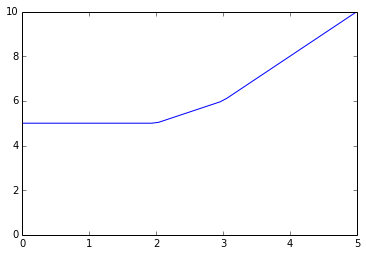

In [31]:
plt.plot(x,y)
plt.ylim(0,10)

### Tropical Curves

A <b style="color:red;">tropical curve</b> $\Gamma$ in $\mathbb{T}^2$ is a tropical hypersurface in $\mathbb{T}^2$. That is, it is a collection of roots of one tropical polynomial $f(x,y)$ of two variables. In other words, we have $\Gamma = V(f)$.

In [32]:
def drawgraph(points, lines, xy=[-2,5,-2,5], c=(0,0,0)):
    """points 的格式如 [[x1, y1], [x2, y2], [x3, y3]]
    lines 為 [[i1, j1], [i2, j2]] 等等, 每個數對 [i,j] 表從 i 連到 j 的線段"""
    X = [x[0] for x in points]
    Y = [y[1] for y in points]
    cor_lines = [[points[l[0]],points[l[1]]] for l in lines]
    line_segments = mpl.collections.LineCollection(cor_lines,colors=c,linewidth=3)
    fig, ax = subplots()
    ax.add_collection(line_segments)
    ax.set_xlim(xy[0],xy[1])
    ax.set_ylim(xy[2],xy[3])
    ax.scatter(X,Y, c=(0,0,0), s=40)
    ax.axison = False

#### Example

$$f(x,y) = x \oplus y \oplus 1$$

In [33]:
# 0:(1,1) 1:(6,6) 2:(-5,0) 3:(0,-5)
P = [[1,1], [6,6], [-5,1], [1,-5]]
L = [[0,1], [0,2], [0,3]]

#### $x = y \geq 1$

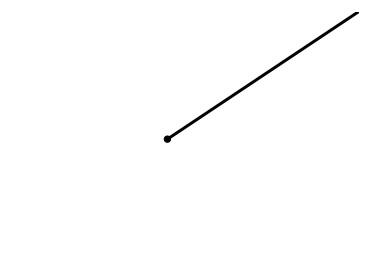

In [34]:
drawgraph(P, L[:1])

#### $y=1 \geq x$

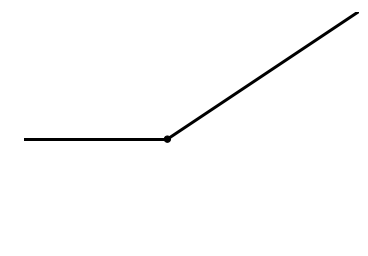

In [35]:
drawgraph(P, L[:2])

$x=1 \geq y$

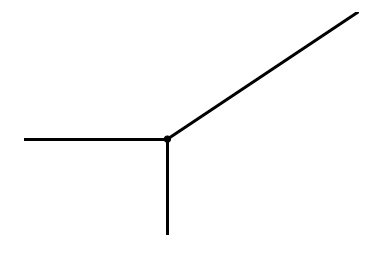

In [36]:
drawgraph(P, L)

### Dual Graph

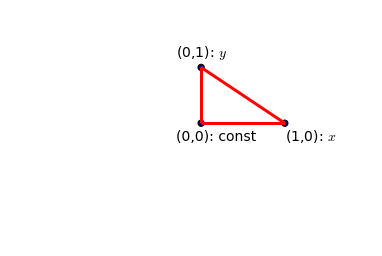

In [37]:
triP = [[0,0], [1,0], [0,1]]
triL = [[0,1], [1,2], [2,0]]
drawgraph(triP, triL, xy=[-2,2,-2,2], c=(1,0,0))
text(-0.3,-0.3, "(0,0): const", fontsize=14)
text(1, -0.3, "(1,0): $x$", fontsize=14)
text(-0.3, 1.2, "(0,1): $y$", fontsize=14)

![Dual](images/dual.png)

## Tropical Elliptic Curves I

### First Try

How about the graph of

$$"y^2 = x^3 + Ax + B"?$$

It shoud be the roots of the tropical polynomial:

$$y^{\odot 2} \oplus x^{\odot 3} \oplus A \cdot x \oplus B$$

![naive tropical elliptic curve](images/naive.png)

### Problem?

We will see this kind of "elliptic curves" always have trivial Picard groups.

## Tropical Divisors

A <b style="color:red;">tropical divisor</b> D is a formal linear combination of finite points in a tropical curve $\Gamma$, with the coefficients in $\mathbb{Z}$. That is, a tropical divisor is of the form

$$
D=\sum_{v_\alpha \in A} m_\alpha \cdot v_\alpha,
$$

where $A$ is a finite subset of $\Gamma$, and  $m_\alpha \in \mathbb{Z}$, for all $v_\alpha \in A$. 

### Notation

We denote the collection of all divisors on $\Gamma$ by <b style="color:red;">$\mathrm{Div}(\Gamma)$</b>.

### Remark

Let $\Gamma$ be a tropical curve. It is obvious that $\mathrm{Div}(\Gamma)$ is a free abelian group.

### Degrees of Divisors

The <b style="color:red;">degree</b> $\deg(D)$ of a divisor is defined by 

$$
\deg(D)=\sum_{v_\alpha \in A} m_\alpha.
$$


### Effective Divisor

A divisor $D$ is called <b style="color:red;">effective</b> divisor if all coefficients of $D$ are greater or equal to zero. We will use the notation $D \geq 0$ if $D$ is effective.

### Canonical Divisors

Let $\Gamma$ be a tropical curve. The <b style="color:red;">canonical divisor</b> $K$ is the divisor on $\Gamma$ defined by 

$$
K=\sum_{v \in \Gamma}  (\deg (v) - 2) \cdot v.
$$ 

### Tropical Meromorphic Functions (on a curve)

A <b style="color:red;">tropical meromorphic function</b> $f$ on $\Gamma$ is a piecewise linear function defined on $\Gamma$, and the slope of the function is an integer on all pieces.

![tropical meromorphic function](images/contidivfun.png)

### Meromorphic Functions

Let $f$ be a meromorphic function on a tropical curve $\Gamma$. The <b style="color:red;">order of $f$ at the point $P$</b> in $\Gamma$ is the sum of the outgoing slope at point $P$. We denote the order of $f$ at $P$ by <b style="color:red;">$\mathrm{ord}_P (f)$</b>.   


### Principle Divisor

Let $\Gamma$ be a tropical curve. A divisor $D$ in $\mathrm{Div}(\Gamma)$ is called a <b style="color:red;">principle divisor</b> if 

$$
D = (f) =\sum_{P \in \Gamma}\mathrm{ord}_P(f) \cdot P.
$$

The collection of all principal divisors of $\Gamma$ is denoted by <b style="color:red;">$\mathrm{Prin}(\Gamma)$</b>.

### Linearly Equivalent

Two tropical divisors $D_1$ and $D_2$ on a tropical curve $\Gamma$ is <b style="color:red;">linearly equivalent</b> if there is a meromorphic function $f$ on $\Gamma$ such that

$$
D_1 - D_2 = (f),
$$ 

which we denoted by $D_1 \sim D_2$.

### A Tropical Principle Divisor is of degree 0

It is easy to check, a tropical principle divisor is of degree $0$, as in the classical divisor theory. 

### $\mathrm{Div}_k(\Gamma)$

The collection of all divisors of degree $k$ of a tropical curve $\Gamma$ is denoted by <b style="color:red;">$\mathrm{Div}_k(\Gamma)$</b>.

### Divisors on the Same Tentacle

Let $\Gamma$ be a tropical curve and $P, Q$ be two points on a connected tentacle of $\Gamma$. Then $P \sim Q$ as divisors of $\Gamma$.


## Tropical Elliptic Curve II

A <b style="color:red;">tropical elliptic curve</b> is a smooth tropical curve of degree three with genus one.

In [38]:
P = [[0,3], [0,2], [0,1], [0,0], [1,2], [1,1], [1,0], [2,1], [2,0], [3,0]]
L = [[0,3], [3,9], [0,9], [3,5], [1,4], [2,4], [3,5], [5,7], [4,6], [7,8]]

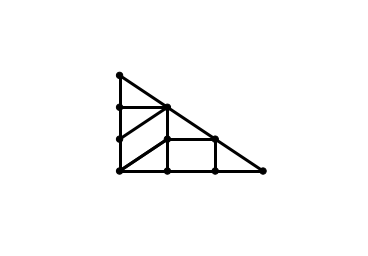

In [39]:
drawgraph(P,L)

In [40]:
P = [[0,0], [-1,1], [1,1], [1,0], [-2,2], [-2,3], [2,-1], [3,-1],
     [0,-5], [2,-5], [3,-5], [8,4], [6,6],
     [5,10], [-4,3], [-4,2], [-4,1]]
L = [[0,1], [1,2], [2,3], [0,3], [1,4], [4,5], [3,6], [6,7],
     [0,8], [6,9], [7,10], [7,11], [2,12],
     [5,13], [5,14], [4,15], [1,16]]

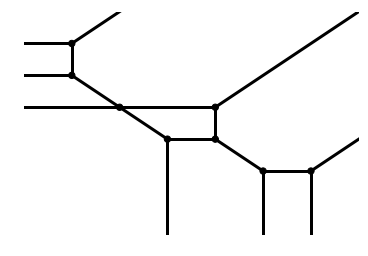

In [41]:
drawgraph(P,L,xy=[-3,4,-3,4])

### Core of a Tropical Curve

Let $\Gamma$ be a tropical elliptic curve, and cutting the tentacles of $\Gamma$ which denoted by $C$.  We call it the <b style="color:red;">core</b> of the tropical elliptic curve $\Gamma$.

### Picard Group

Let $\Gamma$ be a tropical elliptic curve and let C be its core. We have


$$
\mathrm{Pic}(C) =\frac{\mathrm{Div}_0(\Gamma)}{\mathrm{Prin}(\Gamma)} = \frac{\mathrm{Div}_0(C)}{\mathrm{Prin}(C)} = \mathrm{Pic}(\Gamma).
$$


### Group Structure

Let l be the length of C. Fix an arbitrary point $P_0$ on $C$. For each points $P, Q$ in $C$, let $x, y$ be the distance from $P$ to $P_0$, and $Q$ to $P_0$, respectively. We calculate the distance from $P_0$ counterclockwisely. Define an operation $*$ of $C$ by 

$$
P*Q=R,
$$

where $R$ is the point in $C$ with the distances $(x+y) \mod l$ from $P_0$.
￼

### Tropical Curve and Its Picard Group

The group $(C, *)$ is isomorphic to $\mathrm{Pic}(C)$.